# NumPy学习笔记

关于Python和NumPy的使用可以参考斯坦福`CS231n`的教程：https://cs231n.github.io/python-numpy-tutorial/

Numpy是Python中科学计算的核心库。它提供了一个高性能的多维数组对象，以及用于处理这些数组的工具。

要想使用NumPy，我们首先需要引入`numpy`包：

In [1]:
import numpy as np

## 数组

NumPy数组是所有相同类型的值的网格，并由非负整数元组索引。维数是数组的*秩*；数组的*形状*是一个整数元组，给出沿每个维度的数组大小。

我们可以通过嵌套的Python列表初始化NumPy数组，并使用方括号访问元素：

In [2]:
a = np.array([1, 2, 3])  # 创建一个秩为1的数组
print(type(a))
print(a.shape)
print(a[0], a[1], a[2])
a[0] = 5                 # 改变数组中的一个元素
print(a)

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3], [4,5,6]])  # 创建一个秩为2的数组
print(b)
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


NumPy也提供许多创建数组的函数：

In [4]:
a = np.zeros((2, 2))  # 创建一个全零数组
print(a)

[[0. 0.]
 [0. 0.]]


In [5]:
b = np.ones((1, 2))  # 创建一个全1数组
print(b)

[[1. 1.]]


In [6]:
c = np.full((2, 2), 7)  # 创建一个常量数组
print(c)

[[7 7]
 [7 7]]


In [7]:
d = np.eye(2)  # 创建一个2x2的单位矩阵
print(d)

[[1. 0.]
 [0. 1.]]


In [8]:
e = np.random.random((2, 2))  # 创建一个填充随机数的数组
print(e)

[[0.23316062 0.89221292]
 [0.15442143 0.18416244]]


更多创建数组的方法请见[官方文档](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation)。

## 数组索引

NumPy提供了几种索引数组的方式。

**切片：**类似于Python的列表，NumPy数组可以被切片。由于数组可能是多维的，因此必须为数组的每个维度指定一个切片：

In [9]:
# 创建这样一个秩为2、形状为(3, 4)的数组
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 使用切片来提取由前2行，列号为1、2组成的子数组
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


数组的一个切片是对于同一数据的一个视图，因此修改它将修改原数组：

In [10]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0]与a[0, 1]是同一条数据
print(a[0, 1])

2
77


你也可以将整数索引与切片索引混合使用。但是，这样做将产生比原始数组的秩低的数组：

In [11]:
# 创建这样一个秩为2、形状为(3, 4)的数组
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


两种访问数组中间行数据的方式。将整数索引与切片混合使用会产生一个较低秩的数组，而仅使用切片会产生一个与原始数组等秩的数组：

In [12]:
row_r1 = a[1, :]    # a的第二行的秩为1的视图
row_r2 = a[1:2, :]  # a的第二行的秩为2的视图
row_r3 = a[[1], :]  # a的第二行的秩为2的视图
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


在访问数组的列时，我们可以进行相同的区分：

In [13]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**整数数组索引：**当使用切片对NumPy数组进行索引时，生成的数组视图将始终是原始数组的子数组。相反，整数数组索引允许你使用另一个数组中的数据构造任意数组：

In [14]:
a = np.array([[1,2], [3, 4], [5, 6]])

# 整数数组索引的一个例子
# 返回的数组将是(3,)形状的
print(a[[0, 1, 2], [0, 1, 0]])

# 上面的整数数组索引的例子与这个等价：
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


使用整数数组索引时，可以重复使用源数组中的相同元素：

In [15]:
print(a[[0, 0], [1, 1]])

# 等价于：
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


整数数组索引的一个有用技巧是从矩阵的每一行中选择或更改一个元素：

In [16]:
# 创建一个新数组，从中选择元素
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

# 创建索引数组
b = np.array([0, 2, 0, 1])

# 使用b中的索引从a的每行中选择一个元素
print(a[np.arange(4), b])

# 使用b中的索引对a的每行中的一个元素进行改变
a[np.arange(4), b] += 10
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**布尔数组索引：**布尔数组索引使您可以挑选出数组的任意元素。通常，这种类型的索引用于选择满足某些条件的数组元素：

In [17]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # 找出大于2的元素；
                    # 这将返回一个与a形状相同的numpy布尔数组，
                    # 其中bool_idx的每个位置代表a中对应元素是否大于2。

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [18]:
# 我们使用布尔数组索引来构建一个秩为1的数组，
# 该数组由bool_idx中值为True的对应元素组成
print(a[bool_idx])

# 我们可以用一个简洁的语句完成上述操作：
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


更多关于NumPy数组索引的信息请见[官方文档](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)。

## 数据类型

每个NumPy数组都是相同类型的元素的网格。NumPy提供了大量可用于构造数组的数据类型。在创建数组时，NumPy会尝试猜测一个数据类型，但是构造数组的函数通常还包含一个可选参数来明确指定数据类型：

In [19]:
x = np.array([1, 2])  # 让NumPy选择数据类型
print(x.dtype)

x = np.array([1.0, 2.0])  # 让NumPy选择数据类型
print(x.dtype)

x = np.array([1, 2], dtype=np.int64)  # 强制数据类型
print(x.dtype)

int32
float64
int64


更多关于NumPy数据类型的信息请见[官方文档](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)。

## 数组运算

基本数学函数在数组上逐元素进行操作，并且可用作运算符重载和NumPy模块中的函数：

In [20]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 逐元素求和；都产生数组
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [21]:
# 逐元素求差；都产生数组
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [22]:
# 逐元素相乘；都产生数组
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [23]:
# 逐元素相除；都产生数组
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [24]:
# 逐元素求平方根；产生数组
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


注意，`*`是逐元素相乘，不是矩阵乘法。取而代之，用`dot`函数计算向量的内积、向量与矩阵的乘积以及矩阵与矩阵的乘积。

In [25]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# 向量的内积；都是219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [26]:
# 矩阵/向量乘积；都产生秩为1的数组[29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [27]:
# 矩阵/矩阵乘积；都产生秩为2的数组
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


NumPy提供了许多有用的函数来对数组执行计算。最有用的之一是`sum`：

In [28]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # 计算所有元素之和
print(np.sum(x, axis=0))  # 计算每一列之和
print(np.sum(x, axis=1))  # 计算每一行之和

10
[4 6]
[3 7]


NumPy提供的数学函数的完整列表请见[官方文档](https://docs.scipy.org/doc/numpy/reference/routines.math.html)。

除了用数组计算数学函数外，我们经常需要整形或以其他方式处理数组中的数据。此类操作的最简单的例子是转置矩阵；要转置矩阵，只需使用数组对象的`T`属性：

In [29]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [30]:
# 注意，对秩为1的数组求转置不会有任何变化：
v = np.array([1,2,3])
print(v)
print(v.T)

[1 2 3]
[1 2 3]


NumPy提供了许多操作数组的函数，完整列表请见[官方文档](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)。

## 广播

广播是一种强大的机制，允许NumPy在执行算术运算时处理不同形状的数组。通常，我们有一个较小的数组和一个较大的数组，并且我们想多次使用较小的数组对较大的数组执行某些操作。

例如，假设我们要向矩阵的每一行添加一个常向量。我们可以这样做：

In [31]:
# 我们将向量v加到矩阵x的每一行，
# 并将结果存储在矩阵y中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # 创建一个与x形状相同的空矩阵

# 通过显式循环将向量v加到矩阵x的每一行
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这是可行的；但是当矩阵`x`非常大时，在Python中计算显式循环可能会很慢。注意，将向量`v`加到矩阵`x`的每一行相当于：垂直堆叠`v`的多个副本形成矩阵`vv`，然后执行`x`和`vv`的逐元素求和。我们可以这样实现这种方法：

In [32]:
vv = np.tile(v, (4, 1))   # 将v的4个副本堆叠在一起
print(vv)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [33]:
y = x + vv  # x和vv逐元素相加
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


NumPy广播使我们无需实际创建多个v的副本即可执行此计算。考虑使用广播的这个版本：

In [34]:
# 我们将向量v加到矩阵x的每一行，
# 并将结果存储在矩阵y中
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # 通过广播将v加到x的每一行
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


即使`x`的形状是`(4, 3)`而`v`的形状是`(3,)`，但由于广播，`y = x + v`这一行仍然可以工作；这一行的工作方式就好像v实际具有`(4, 3)`的形状，其中每一行都是`v`的一个副本，并且求和是逐元素进行的。

将两个阵列广播到一起遵循以下规则：
1. 如果几个数组的秩不同，则在低秩数组的形状前面加1补齐，直到二者的形状具有相同的长度；
2. 如果两个数组在某个维度上的大小相同，或者其中一个数组在该维度上的大小为1，则称这两个数组该维度上*兼容*；
3. 如果几个数组在所有维度上都兼容，则它们可以广播到一起；
4. 广播后的数组形状等于输入数组的形状在各个维度上的最大值；
5. 在任一维度中，如果一个数组的大小为1而另一个数组的大小大于1，则第一个数组的行为就像是沿着该维度复制的一样。

如果上述解释难以理解，可以尝试阅读[官方文档](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)中的解释或[这篇解释](https://docs.scipy.org/doc/numpy/user/theory.broadcasting.html)。

支持广播的函数称为通用函数。所有通用功能的列表请见[官方文档](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)。

以下是广播的一些应用：

In [35]:
# 计算向量的张量积：
v = np.array([1,2,3])  # v具有形状(3,)
w = np.array([4,5])    # w具有形状(2,)
# 为了计算外积，我们首先将v整形为形状为(3, 1)的列向量；
# 然后我们可以把它广播到w上，以产生形状(3, 2)的输出，
# 即v和w的外积：
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [36]:
# 将向量加到矩阵的每一行：
x = np.array([[1,2,3], [4,5,6]])
# x具有形状(2, 3)而v具有形状(3,)，因此它们广播到(2, 3)
print(x + v)

[[2 4 6]
 [5 7 9]]


In [37]:
# 将向量加到矩阵的每一列：
# x具有形状(2, 3)而w具有形状(2,)。
# 如果我们对x求转置，则它具有形状(3, 2)，
# 并且可以对w进行广播以产生形状(3, 2)的结果；
# 转置此结果将得出形状(2, 3)的最终结果，
# 即将向量w加到矩阵x的每一列的矩阵。
print((x.T + w).T)

# 另一种解决方案是将w整形为(2, 1)的列向量；
# 然后我们可以直接对x广播它以产生相同的输出。
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]


In [38]:
# 矩阵乘以常数：
# x具有形状(2, 3)。NumPy将标量视为形状为()的数组；
# 它们可以广播到一起，生成形状为(2, 3)的数组。
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


广播通常会使您的代码更简洁，更快捷，因此，您应尽可能使用它。

## NumPy文档

上文中简短的描述涉及到了您需要了解的有关NumPy的许多重要知识，但还远远不够。查看[NumPy参考](https://docs.scipy.org/doc/numpy/reference/)以了解更多关于NumPy的信息。

## Matplotlib

[Matplotlib](https://matplotlib.org/)是一个绘图库。在本节中将简要介绍`matplotlib.pyplot`模块，该模块提供了类似于MATLAB的绘图系统。

In [39]:
import matplotlib.pyplot as plt

通过运行这个特殊的iPython命令，我们将内联显示绘图：

In [40]:
%matplotlib inline

### 绘图

Matplotlib中最重要的函数是`plot`，它允许您绘制2D数据。这是一个简单的示例：

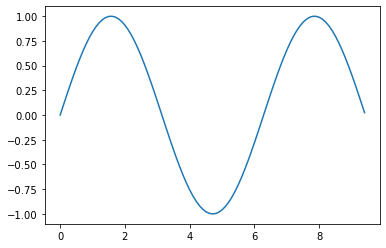

In [41]:
# 计算正弦曲线上的点的x和y坐标
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# 使用Matplotlib绘制这些点
plt.plot(x, y)
plt.show()  # 必须调用plt.show()才能显示图形

仅需一点点额外的工作，我们就可以轻松地一次绘制多条线，并添加标题、图例和轴标签：

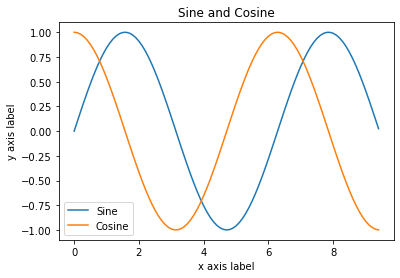

In [42]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# 使用Matplotlib绘制这些点
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

您可以在[官方文档](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)中阅读有关`plot`函数的更多信息。

### 子图

可以使用`subplot`函数在同一图中绘制不同的内容。下面是一个例子：

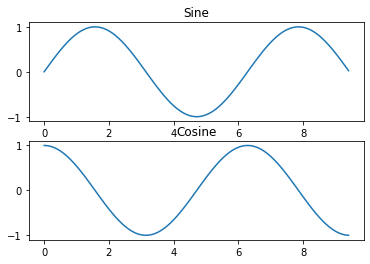

In [43]:
# 计算正弦和余弦曲线上的点的x和y坐标
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 建立高度为2、宽度为1的子图网格，
# 并将第一个子图设置为活动状态
plt.subplot(2, 1, 1)

# 绘制第一个图
plt.plot(x, y_sin)
plt.title('Sine')

# 将第二个子图设置为活动状态，并绘制第二个图
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# 显示该图
plt.show()

您可以在[官方文档](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)中阅读有关`subplot`函数的更多信息。